In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combine = pd.merge(city, ride, how = 'outer', on ='city')

# Display the data table for preview
combine.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:
urban = combine.loc[(combine["type"] == "Urban")]
suburban = combine.loc[(combine["type"] == "Suburban")]
rural = combine.loc[(combine["type"] == "Rural")]

In [3]:
fareurban = urban.groupby(['city'])['fare'].sum()
ridesurban = urban.groupby(['city'])['ride_id'].sum()
driversurban = urban.groupby(['city'])['driver_count'].sum()

faresuburban = suburban.groupby(['city'])['fare'].sum()
ridessuburban = suburban.groupby(['city'])['ride_id'].sum()
driverssuburban = suburban.groupby(['city'])['driver_count'].sum()

farerural = rural.groupby(['city'])['fare'].sum()
ridesrural = rural.groupby(['city'])['ride_id'].sum()
driversrural = rural.groupby(['city'])['driver_count'].sum()

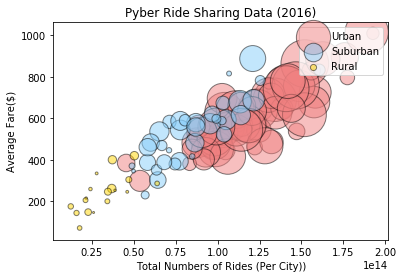

In [4]:
plt.scatter(ridesurban, fareurban,s=driversurban,
            marker ='o', facecolors ="lightcoral", edgecolors='black',alpha = 0.5, label="Urban")

plt.scatter(ridessuburban, faresuburban,s=driverssuburban,
            marker ='o', facecolors ="lightskyblue", edgecolors='black',alpha = 0.5, label="Suburban")

plt.scatter(ridesrural,farerural,s=driversrural,
            marker ='o', facecolors ="gold", edgecolors='black',alpha = 0.5, label="Rural")




plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Numbers of Rides (Per City))")
plt.ylabel("Average Fare($)")
plt.legend(loc='upper right')

## Total Fares by City Type

<function matplotlib.pyplot.show(*args, **kw)>

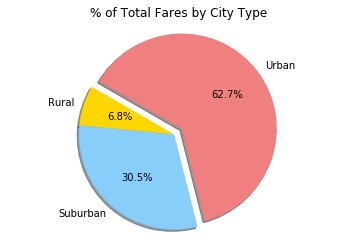

In [5]:
city= combine.groupby('type')['fare'].sum()

labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0, 0, 0.1]

plt.pie(city, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=150)
plt.axis('equal')
plt.title('% of Total Fares by City Type')
plt.show

## Total Rides by City Type

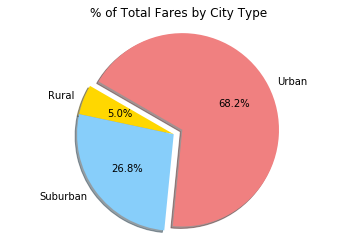

In [6]:
ride= combine.groupby('type')['ride_id'].sum()

labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0, 0, 0.1]
plt.pie(ride, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=150)
plt.axis('equal')
plt.title('% of Total Fares by City Type')
plt.show
plt.savefig("ride.png", bbox_inches = 'tight')
plt.show()



## Total Drivers by City Type

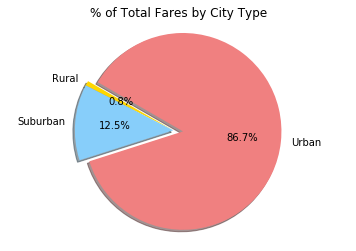

In [7]:
driver= combine.groupby('type')['driver_count'].sum()

labels = ['Rural', 'Suburban', 'Urban']
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = [0, 0, 0.1]
plt.pie(driver, labels=labels, colors=colors, explode=explode,
        autopct="{0:1.1f}%".format, shadow=True, startangle=150)
plt.axis('equal')
plt.title('% of Total Fares by City Type')
plt.savefig("drivers.png", bbox_inches = 'tight')
plt.show()
